In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
data = pd.read_csv("diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [9]:
x = data.iloc[:, :2]
y = data.Outcome
x.head()
print(x)
print(y)

     Pregnancies  Glucose
0              6      148
1              1       85
2              8      183
3              1       89
4              0      137
..           ...      ...
763           10      101
764            2      122
765            5      121
766            1      126
767            1       93

[768 rows x 2 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
svm = SVC(kernel='rbf', C=1, gamma=0.5)
svm.fit(x_train, y_train)

SVC(C=1, gamma=0.5)

In [11]:
y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test,y_pred) *100
print("Accuracy: {:.2f}%", format(accuracy*100))

Accuracy: {:.2f}% 6562.5


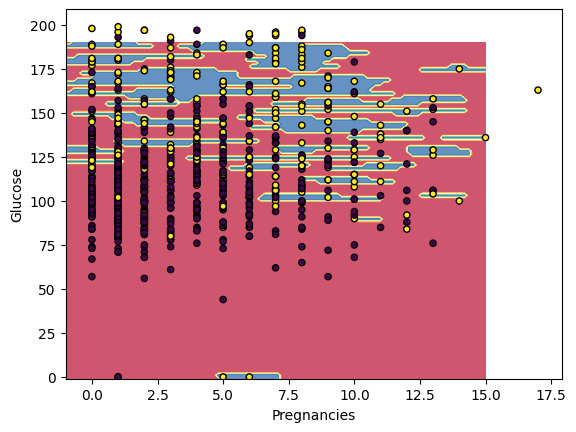

In [13]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    x_test,
    response_method="predict",
    cmap=cm.Spectral,
    alpha=0.8,
)

plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,edgecolors='k', s=20)